# Importing libraries and Datasets

In [550]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import datetime


In [551]:
df = pd.read_csv("houses.csv", usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [552]:
df.shape

(1201, 10)

In [553]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [555]:
for i in df.columns:
    print("Column Name: {} and unique values: {}". format(i, len(df[i].unique())))

Column Name: MSSubClass and unique values: 15
Column Name: MSZoning and unique values: 5
Column Name: LotFrontage and unique values: 110
Column Name: LotArea and unique values: 869
Column Name: Street and unique values: 2
Column Name: LotShape and unique values: 4
Column Name: YearBuilt and unique values: 112
Column Name: 1stFlrSF and unique values: 678
Column Name: 2ndFlrSF and unique values: 368
Column Name: SalePrice and unique values: 597


### ~All the features that have limited variations in their values have to be converted into categorical data

In [556]:
datetime.datetime.now().year

2024

In [557]:
df['Total_Years'] = datetime.datetime.now().year - df["YearBuilt"]


In [558]:
df.drop("YearBuilt",axis = 1,inplace=True)

In [559]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total_Years'],
      dtype='object')

In [560]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,24


### ~Applying Label Encoding

In [561]:
# Creating Categorcal Data
cat_features = ['MSSubClass', 'MSZoning','Street','LotShape']
out_feature = "SalePrice"

In [562]:
lbl_encoders={} 
lbl_encoders["MSSubClass"] = LabelEncoder() 
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [563]:
lbl_encoders={} 
for feature in cat_features:
    lbl_encoders[feature] = LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [564]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total_Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24


### ~Applying Embedding:

In [565]:
## Stacking and COnverting into Tensors

cat_features = np.stack([df['MSSubClass'], df['MSZoning'],df['Street'] , df['LotShape']] , axis=1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [566]:
## COnvert numpy arrays to tensors

cat_features = torch.tensor(cat_features, dtype=torch.int64)  # Very important to convert categorical data types into int date type.
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [567]:
## Create Continuous Variables
cont_feature = []

for i in df.columns:
    if i in ['MSSubClass', 'MSZoning','Street','LotShape','SalePrice']:
        pass
    else:
        cont_feature.append(i)
        


In [568]:
cont_feature

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_Years']

In [569]:
## Stacking Continuos Variables:
cont_values = np.stack([df[i].values for i in cont_feature] , axis=1)
cont_values = torch.tensor(cont_values , dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [570]:
cont_values.dtype

torch.float32

In [571]:
# Dependent Features:
y = torch.tensor(df['SalePrice'].values, dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total_Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


In [573]:
cat_features.shape , cont_values.shape, y.shape, df.shape

(torch.Size([1201, 4]),
 torch.Size([1201, 5]),
 torch.Size([1201, 1]),
 (1201, 10))

In [574]:
len(df['MSSubClass'].unique())

15

# Embedding:
#### Each categories are converted to their feature vector representation using Embedded Matrix whose dimension is:
##### By thumb rule : min(50, (x+1)//2) for Categorical Data Conversion but not for NLP applications.

In [575]:
## Embedding Size for Categorical Features:

cat_dims = [(len(df[col].unique())) for col in ['MSSubClass', 'MSZoning','Street','LotShape']]

In [576]:
cat_dims

[15, 5, 2, 4]

In [577]:
# Creating Embedded Vector dimensions using thumb rule

embedding_dims = [(x, min(50,(x+1)//2)) for x in cat_dims]

In [578]:
embedding_dims

[(15, 8), (5, 3), (2, 1), (4, 2)]

### CREATING ACTUAL EMBEDDING MATRIX: DOING WORD2VEC 

In [579]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [580]:
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [581]:
cat_featuresz = cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [582]:
# ACTUAL EMBEDDING FUNCTION:

pd.set_option('display.max_rows',500)
embedding_val = []
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_featuresz[:,i]))

In [583]:
embedding_val

[tensor([[ 0.1451, -0.3495, -0.8158,  0.2591, -1.2562,  0.1551, -0.8206,  0.7307],
         [ 0.5525,  0.5280,  0.3909, -0.3355, -1.1324,  0.6381,  0.7725,  1.0573],
         [ 0.1451, -0.3495, -0.8158,  0.2591, -1.2562,  0.1551, -0.8206,  0.7307],
         [-0.0940, -0.7077,  1.0688,  0.0086, -0.0728,  1.0848, -1.3235,  0.2868]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.7823, -1.5325,  0.2879],
         [ 0.7823, -1.5325,  0.2879],
         [ 0.7823, -1.5325,  0.2879],
         [ 0.7823, -1.5325,  0.2879]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.7821],
         [-0.7821],
         [-0.7821],
         [-0.7821]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3214, -0.2320],
         [-0.3214, -0.2320],
         [ 1.2019, -0.3540],
         [ 1.2019, -0.3540]], grad_fn=<EmbeddingBackward0>)]

In [584]:
z = torch.cat(embedding_val,1)
z

tensor([[ 0.1451, -0.3495, -0.8158,  0.2591, -1.2562,  0.1551, -0.8206,  0.7307,
          0.7823, -1.5325,  0.2879, -0.7821, -0.3214, -0.2320],
        [ 0.5525,  0.5280,  0.3909, -0.3355, -1.1324,  0.6381,  0.7725,  1.0573,
          0.7823, -1.5325,  0.2879, -0.7821, -0.3214, -0.2320],
        [ 0.1451, -0.3495, -0.8158,  0.2591, -1.2562,  0.1551, -0.8206,  0.7307,
          0.7823, -1.5325,  0.2879, -0.7821,  1.2019, -0.3540],
        [-0.0940, -0.7077,  1.0688,  0.0086, -0.0728,  1.0848, -1.3235,  0.2868,
          0.7823, -1.5325,  0.2879, -0.7821,  1.2019, -0.3540]],
       grad_fn=<CatBackward0>)

In [585]:
## Implement Dropout:
dropout = nn.Dropout(.4)

In [586]:
final_embed = dropout(z)
final_embed 

tensor([[ 0.2419, -0.5824, -0.0000,  0.4319, -0.0000,  0.0000, -1.3676,  0.0000,
          1.3039, -0.0000,  0.4799, -1.3035, -0.5357, -0.3866],
        [ 0.9209,  0.8799,  0.6514, -0.0000, -0.0000,  1.0635,  1.2874,  1.7622,
          1.3039, -2.5542,  0.4799, -0.0000, -0.0000, -0.0000],
        [ 0.2419, -0.0000, -0.0000,  0.4319, -2.0937,  0.2585, -1.3676,  1.2179,
          0.0000, -0.0000,  0.4799, -1.3035,  2.0032, -0.5900],
        [-0.1567, -1.1795,  1.7813,  0.0144, -0.0000,  1.8080, -2.2058,  0.0000,
          0.0000, -2.5542,  0.0000, -0.0000,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)

#### Creating Neural Network:

In [587]:
class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dims,n_cont, out_sz, layers , p =0.5 ):
        # embedding_dims : Dimensions of all the embedding layers to be performed
        # n_cont: Number of features with continuos values
        # out_sz : Number of Output features
        # layers: list containing number of neurons in hidden layers
        # p: dropout probability 
        super().__init__()
        self.embds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dims])   # Discussed Earlier
        self.emb_dropout = nn.Dropout(p) # To apply Dorpout
        self.batch_norm_cont = nn.BatchNorm1d(n_cont)   # To apply Normalisation to Continuous Values since they are very large
        
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dims))
        n_in = n_emb + n_cont
        # For the input size : n_in,
        # n_cont : denotes number of continuos features
        # n_emb: denotes total number of features we we get after performing embedding on categorical features
            
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
            
        self.layers = nn.Sequential(*layerlist)
        # Initially layers was a list containing just list of number of neurons in the hidden layers , but now it is a complete module in itself.
        # nn.Sequential() : stores multiple modules and run them in sequence. It takes as arguments all the modules it has to run in sequence, hence * before layerlist.
        # *layerlist: unpacks all the list/tuple items because this is how Sequential() takes arguments.
        
    def forward(self, x_cat, x_cont):
        embedding = []
        for i,e in enumerate(self.embds):
            embedding.append(e(x_cat[:,i]))
        x = torch.cat(embedding,axis=1)
        x = torch.cat([x,x_cont],axis = 1)
        x = self.layers(x)
        return x

In [588]:
len(cont_feature)

5

In [589]:
# Instantiate model:

torch.manual_seed(100)
model = FeedForwardNN(embedding_dims,len(cont_feature),1,[100,50],p=0.4)

In [590]:
model

FeedForwardNN(
  (embds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=5

### Defining Loss Function and Optimiser:


In [591]:
loss_function = nn.MSELoss()     # Later on will be converted to RMSE by taking square root
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [592]:
cat_features.shape , cont_values.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]))

In [593]:
# Creating Train-Test Split

batch_size = 1200
test_size = int(batch_size* 0.15)

train_categorical_data = cat_features[:batch_size-test_size]
test_categorical_data = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont = cont_values[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size] 

In [594]:
train_categorical_data.shape , test_categorical_data.shape , train_cont.shape , test_cont.shape, y_train.shape , y_test.shape

(torch.Size([1020, 4]),
 torch.Size([180, 4]),
 torch.Size([1020, 5]),
 torch.Size([180, 5]),
 torch.Size([1020, 1]),
 torch.Size([180, 1]))

In [595]:
# Running the model:


epochs = 5000
final_losses = []

for i in range(epochs):
    y_pred = model(train_categorical_data,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train))   # RMSE
    final_losses.append(loss.detach().numpy())
    if i%100==0:
        print("Epoch: {} , Loss: {}".format(i, loss.detach().numpy()))
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 0 , Loss: 200496.78125
Epoch: 100 , Loss: 200356.0
Epoch: 200 , Loss: 199890.09375
Epoch: 300 , Loss: 199067.96875


Epoch: 400 , Loss: 197877.90625
Epoch: 500 , Loss: 196415.46875
Epoch: 600 , Loss: 194526.8125
Epoch: 700 , Loss: 192407.0
Epoch: 800 , Loss: 190102.296875
Epoch: 900 , Loss: 187469.5
Epoch: 1000 , Loss: 184614.671875
Epoch: 1100 , Loss: 181290.34375
Epoch: 1200 , Loss: 177970.890625
Epoch: 1300 , Loss: 174037.1875
Epoch: 1400 , Loss: 170830.953125
Epoch: 1500 , Loss: 166587.109375
Epoch: 1600 , Loss: 162727.265625
Epoch: 1700 , Loss: 158118.21875
Epoch: 1800 , Loss: 154796.8125
Epoch: 1900 , Loss: 150141.625
Epoch: 2000 , Loss: 144341.46875
Epoch: 2100 , Loss: 140000.609375
Epoch: 2200 , Loss: 135339.21875
Epoch: 2300 , Loss: 129751.3671875
Epoch: 2400 , Loss: 124578.140625
Epoch: 2500 , Loss: 119684.296875
Epoch: 2600 , Loss: 115954.2109375
Epoch: 2700 , Loss: 110956.4453125
Epoch: 2800 , Loss: 105429.234375
Epoch: 2900 , Loss: 101582.03125
Epoch: 3000 , Loss: 95531.8984375
Epoch: 3100 , Loss: 92531.8203125
Epoch: 3200 , Loss: 87028.4609375
Epoch: 3300 , Loss: 81496.1796875
Epoch: 34

Text(0, 0.5, 'RMSE Loss')

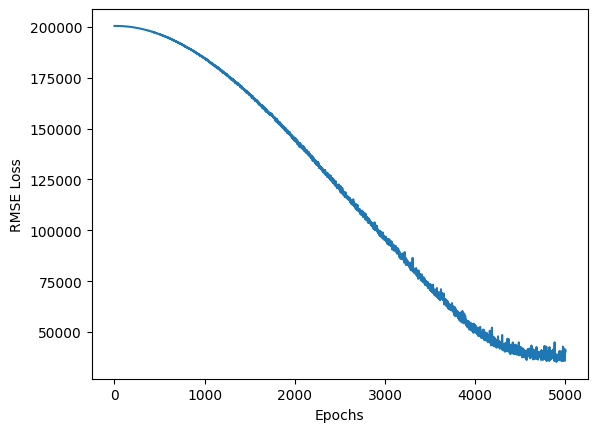

In [597]:
# PLOTTING THE GRAPH:

plt.plot(range(epochs), final_losses)
plt.xlabel("Epochs")
plt.ylabel("RMSE Loss")

#### VALIDATE THE TEST DATA:

In [ ]:
with torch.no_grad():
    y_pred = model(test_categorical_data,test_cont)
    loss = torch.sqrt(loss_function(y_pred,y_test))

print("RMSE Loss On Test Data: {}".format(loss.detach().numpy()))      

RMSE Loss On Test Data: 51972.49609375


In [ ]:
# SAVING THE MODEL details Only

torch.save(model, "HousePrice.pt")

In [ ]:
# Save the model along with weights:

torch.save(model.state_dict(),"HousePriceWithWeights.pt")

In [ ]:
# Loading The saved Model:
embs_size = [(15,8),(5,3),(2,1),(4,2)]
model1 =FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [ ]:
# Loading Model Weights:
model1.load_state_dict(torch.load("HousePriceWithWeights.pt"))

RuntimeError: Error(s) in loading state_dict for FeedForwardNN:
	Unexpected key(s) in state_dict: "layers.10.weight", "layers.10.bias", "layers.10.running_mean", "layers.10.running_var", "layers.10.num_batches_tracked", "layers.12.weight", "layers.12.bias". 
	size mismatch for layers.0.weight: copying a param with shape torch.Size([200, 19]) from checkpoint, the shape in current model is torch.Size([100, 19]).
	size mismatch for layers.0.bias: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for layers.2.weight: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for layers.2.bias: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for layers.2.running_mean: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for layers.2.running_var: copying a param with shape torch.Size([200]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for layers.4.weight: copying a param with shape torch.Size([100, 200]) from checkpoint, the shape in current model is torch.Size([50, 100]).
	size mismatch for layers.4.bias: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for layers.6.weight: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for layers.6.bias: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for layers.6.running_mean: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for layers.6.running_var: copying a param with shape torch.Size([100]) from checkpoint, the shape in current model is torch.Size([50]).
	size mismatch for layers.8.weight: copying a param with shape torch.Size([50, 100]) from checkpoint, the shape in current model is torch.Size([1, 50]).
	size mismatch for layers.8.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([1]).

In [ ]:
model1.eval()

FeedForwardNN(
  (embds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)